# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [155]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [156]:
# SVR : Regrresion, SVC : Classfication
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE


## SVM을 이용한 회귀 모델과 분류 모델

 SVR : Regrresion, SVC : Classfication

### SVM을 사용한 회귀 모델 (SVR)

In [157]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.2177283706374875
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [158]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [159]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf') # default
rbf_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))


Linear SVR 학습 데이터 점수: 0.715506620496448
Linear SVR 평가 데이터 점수: 0.6380398541506058
Linear SVR 학습 데이터 점수: 0.2024454261446289
Linear SVR 평가 데이터 점수: 0.133668450367462
Linear SVR 학습 데이터 점수: 0.2177283706374875
Linear SVR 평가 데이터 점수: 0.13544178468518187


In [160]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf') # default
rbf_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))


Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Linear SVC 학습 데이터 점수: 0.9014084507042254
Linear SVC 평가 데이터 점수: 0.9230769230769231
Linear SVC 학습 데이터 점수: 0.9014084507042254
Linear SVC 평가 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [161]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


In [162]:
polynomial_svc = SVC(kernel='poly',degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

params = polynomial_svc.get_params()
print("kernel={}, degree={}, C={}, gamma={}".format(params['kernel'],params['degree'], 
                                                    params['C'],params['gamma']))

print("Linear SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))


kernel=poly, degree=2, C=0.1, gamma=auto
Linear SVC 학습 데이터 점수: 0.9835680751173709
Linear SVC 평가 데이터 점수: 0.993006993006993


In [163]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale') 
rbf_svc.fit(X_train, y_train)

params = rbf_svc.get_params()
print("kernel={}, C={}, gamma={}".format(params['kernel'], 
                                         params['C'],params['gamma']))

print("Linear SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))


kernel=rbf, C=2.0, gamma=scale
Linear SVC 학습 데이터 점수: 0.9154929577464789
Linear SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [164]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


StandardScaler()

In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit은 한번만 해야한다.
X_test = scaler.transform(X_test)

In [166]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


MinMaxScaler()

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # fit은 한번만 해야한다.
X_test = scaler.transform(X_test)

In [168]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [169]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [170]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [172]:
model.get_params() # default

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [173]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.7245983513691931
표준화 평가 데이터 점수: 0.6147612862092505


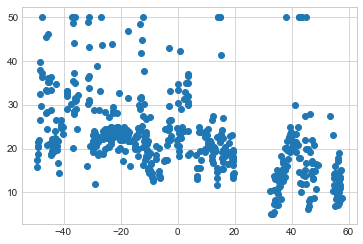

In [174]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

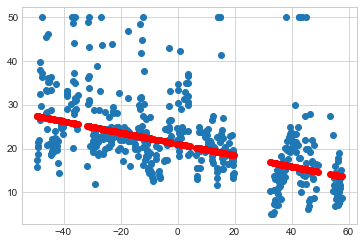

In [175]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [176]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00700331, 0.00600386, 0.00600386, 0.00600386, 0.00600386]),
 'score_time': array([0.        , 0.00099945, 0.00099945, 0.        , 0.00100279]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [177]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  90 out of  90 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [178]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
최적 점수: 0.49854468515517
최적 파라미터: {'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=12)]: Done  67 out of  90 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  90 out of  90 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__epsilon,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.005806,0.001167,0.0002,0.00040,0.1,1,scale,"{'model__C': 0.1, 'model__epsilon': 1.0, 'mode...",0.764240,0.714182,0.502571,0.224690,0.287040,0.498545,0.217642,1
7,0.004605,0.000490,0.0006,0.00080,0.1,1,auto,"{'model__C': 0.1, 'model__epsilon': 1.0, 'mode...",0.764240,0.714182,0.502571,0.224690,0.287040,0.498545,0.217642,1
11,0.005005,0.000633,0.0006,0.00049,0.1,0.01,auto,"{'model__C': 0.1, 'model__epsilon': 0.01, 'mod...",0.764167,0.705551,0.502004,0.192918,0.231339,0.479196,0.235097,3


### 당뇨병

In [179]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [180]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [182]:
model.get_params() # default

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [183]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.492458871681117
표준화 평가 데이터 점수: 0.5570136940699909


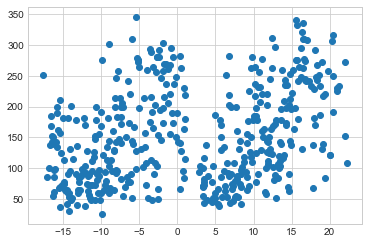

In [184]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

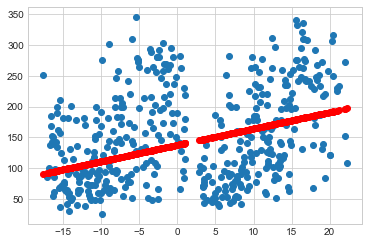

In [185]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [186]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00400352, 0.0030005 , 0.0030005 , 0.00400352, 0.00500417]),
 'score_time': array([0.       , 0.       , 0.       , 0.0010004, 0.       ]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [187]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon': [1.5, 1.0, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.5, 1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [188]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
최적 점수: 0.4780769992158147
최적 파라미터: {'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__epsilon,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.003804,0.001168,0.000400,0.000490,1,1,scale,"{'model__C': 1.0, 'model__epsilon': 1.0, 'mode...",0.432624,0.519202,0.484555,0.421738,0.532266,0.478077,0.044519,1
3,0.004405,0.001358,0.000601,0.000491,1,1,auto,"{'model__C': 1.0, 'model__epsilon': 1.0, 'mode...",0.432624,0.519202,0.484555,0.421738,0.532266,0.478077,0.044519,1
0,0.004002,0.000000,0.000801,0.000400,1,1.5,scale,"{'model__C': 1.0, 'model__epsilon': 1.5, 'mode...",0.430545,0.518453,0.484242,0.420315,0.531761,0.477063,0.045035,3


## Kernel SVR 

### 보스턴 주택 가격

In [189]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [190]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [192]:
model.get_params() # default

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [193]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.6804558691341751
표준화 평가 데이터 점수: 0.5895829313193316


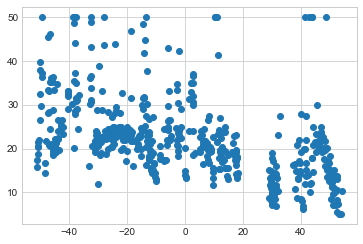

In [194]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

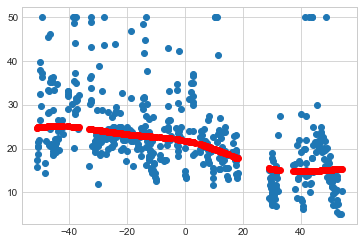

In [195]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [196]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00400543, 0.00500607, 0.00400496, 0.00600815, 0.00500631]),
 'score_time': array([0.00100064, 0.        , 0.00100136, 0.00099969, 0.        ]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

여기서는 모든 커널을 해보도록 하자

In [197]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'poly', 'sigmoid']}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [198]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])
최적 점수: 0.17631266230186618
최적 파라미터: {'model__kernel': 'rbf'}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  15 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007005,0.000633,0.001201,4.002095e-04,rbf,{'model__kernel': 'rbf'},0.757814,0.502110,0.043101,0.338517,-0.759979,0.176313,0.522491,1
2,0.006206,0.001472,0.001001,8.740569e-07,sigmoid,{'model__kernel': 'sigmoid'},0.649210,0.542143,0.188191,0.107161,-0.737625,0.149816,0.488704,2
1,0.008608,0.000490,0.000801,4.006866e-04,poly,{'model__kernel': 'poly'},0.553776,0.555012,0.317362,0.048646,-2.373356,-0.179712,1.112576,3


rbf가 가장 좋으니까~ rbf로 정하고, 다른 파라미터를 조정해 보자.

In [199]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon': [1.5, 1.0, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.5, 1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [200]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])
최적 점수: 0.1780747543330848
최적 파라미터: {'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__epsilon,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.006605,0.000491,0.001402,0.00049,1,0.01,scale,"{'model__C': 1.0, 'model__epsilon': 0.01, 'mod...",0.758271,0.501058,0.044908,0.339123,-0.752987,0.178075,0.519902,1
7,0.006205,0.000400,0.001201,0.00040,1,0.01,auto,"{'model__C': 1.0, 'model__epsilon': 0.01, 'mod...",0.758271,0.501058,0.044908,0.339123,-0.752987,0.178075,0.519902,1
4,0.006406,0.000490,0.001201,0.00040,1,0.1,scale,"{'model__C': 1.0, 'model__epsilon': 0.1, 'mode...",0.757814,0.502110,0.043101,0.338517,-0.759979,0.176313,0.522491,3


### 당뇨병

In [201]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [202]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [204]:
model.get_params() # default

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [205]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.15345164466149963
표준화 평가 데이터 점수: 0.1809671882441687


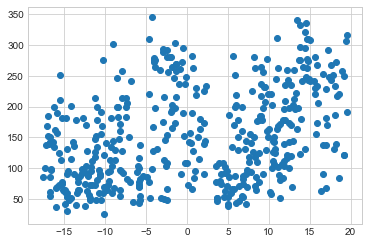

In [206]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

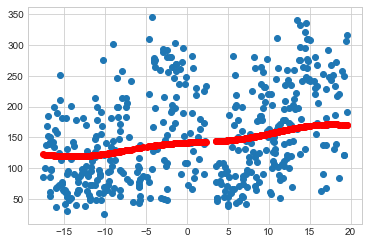

In [207]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [208]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00500512, 0.00300241, 0.00400305, 0.00400639, 0.00400639]),
 'score_time': array([0.        , 0.00100064, 0.        , 0.00100017, 0.00100017]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

여기서는 모든 커널을 해보도록 하자

In [209]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'poly', 'sigmoid']}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [210]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])
최적 점수: 0.3491358880113567
최적 파라미터: {'model__kernel': 'sigmoid'}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  15 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.004804,0.000750,0.000801,0.0004,sigmoid,{'model__kernel': 'sigmoid'},0.288537,0.354180,0.377656,0.359160,0.366147,0.349136,0.031308,1
1,0.004203,0.000400,0.000801,0.0004,poly,{'model__kernel': 'poly'},0.242391,0.184059,0.272529,0.243369,0.230417,0.234553,0.028803,2
0,0.004803,0.000401,0.001001,0.0000,rbf,{'model__kernel': 'rbf'},0.145808,0.125399,0.181638,0.122231,0.157921,0.146599,0.021908,3


rbf가 가장 좋으니까~ rbf로 정하고, 다른 파라미터를 조정해 보자.

In [211]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon': [1.5, 1.0, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.5, 1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [212]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])
최적 점수: 0.35001409316735377
최적 파라미터: {'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 120 out of 120 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__epsilon,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.005605,0.000490,0.001001,1.907349e-07,1,1,auto,"{'model__C': 1.0, 'model__epsilon': 1.0, 'mode...",0.288537,0.353443,0.376918,0.361575,0.369598,0.350014,0.031725,1
2,0.005205,0.000749,0.001001,5.436780e-07,1,1,scale,"{'model__C': 1.0, 'model__epsilon': 1.0, 'mode...",0.288537,0.353443,0.376918,0.361575,0.369598,0.350014,0.031725,2
0,0.005405,0.000490,0.001201,4.004002e-04,1,1.5,scale,"{'model__C': 1.0, 'model__epsilon': 1.5, 'mode...",0.287025,0.352093,0.377427,0.361263,0.371662,0.349894,0.032615,3


최적으로 찾은 것으로 다시 한번 평가해 보자

In [213]:
model = gs.best_estimator_
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [214]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.3726520070304975
표준화 평가 데이터 점수: 0.3905617056363222


위에 kernel='rbf' 는 0.17 수준이었는데 2배 이상 오른것을 볼수 있다.

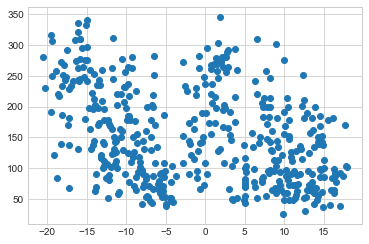

In [215]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

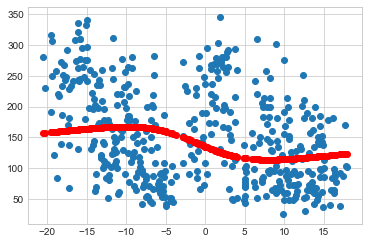

In [216]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

시각화한 결과도 뭔가 조금 더 나아 보인다. 

## Linear SVC

### 유방암

In [217]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [218]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [220]:
model.get_params() # default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [221]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.9868131868131869
표준화 평가 데이터 점수: 0.9912280701754386


시각화

In [222]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [223]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [224]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

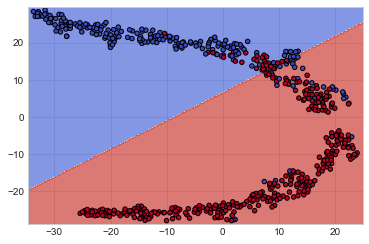

In [225]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');


저차원으로 구분한것이기 때문에 고차원에서는 또 다르게 잘 구분되었기 때문에 score가 0.98이상 이 나온것이다.

In [226]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00300336, 0.00200152, 0.0030067 , 0.00200415, 0.0030067 ]),
 'score_time': array([0.        , 0.00100183, 0.        , 0.        , 0.0009985 ]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [227]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [1.,0.14, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.14, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [228]:
print('best',gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

best Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
최적 점수: 0.9736531594472908
최적 파라미터: {'model__C': 0.1, 'model__gamma': 'scale'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.002402,0.00049,0.0004,0.00049,0.1,scale,"{'model__C': 0.1, 'model__gamma': 'scale'}",0.973684,0.973684,0.973684,0.964912,0.982301,0.973653,0.005499,1
5,0.002803,0.00040,0.0002,0.00040,0.1,auto,"{'model__C': 0.1, 'model__gamma': 'auto'}",0.973684,0.973684,0.973684,0.964912,0.982301,0.973653,0.005499,1
0,0.003203,0.00040,0.0004,0.00049,1,scale,"{'model__C': 1.0, 'model__gamma': 'scale'}",0.964912,0.982456,0.964912,0.964912,0.982301,0.971899,0.008557,3


### 붓꽃

In [229]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [230]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [232]:
model.get_params() # default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [233]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.9833333333333333
표준화 평가 데이터 점수: 0.9333333333333333


시각화

In [234]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [235]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [236]:
X_comp = TSNE(n_components=2).fit_transform(X)

In [237]:
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

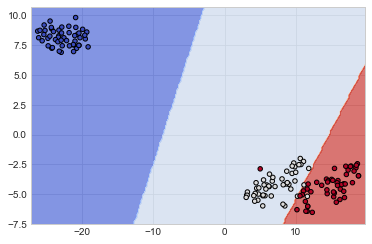

In [238]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [239]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099921, 0.00099921, 0.00099921, 0.00100112, 0.00100112]),
 'score_time': array([0.        , 0.00100112, 0.00100112, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [241]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [0.15,0.14,0.12, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [0.15, 0.14, 0.12, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [242]:
print('best',gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

best Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.15, kernel='linear'))])
최적 점수: 0.9800000000000001
최적 파라미터: {'model__C': 0.15, 'model__gamma': 'scale'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,4.001382e-04,0.0004,0.000490,0.15,scale,"{'model__C': 0.15, 'model__gamma': 'scale'}",0.966667,1.0,1.000000,0.933333,1.0,0.980000,0.026667,1
1,0.001001,1.168008e-07,0.0004,0.000490,0.15,auto,"{'model__C': 0.15, 'model__gamma': 'auto'}",0.966667,1.0,1.000000,0.933333,1.0,0.980000,0.026667,1
2,0.001200,4.002118e-04,0.0002,0.000401,0.14,scale,"{'model__C': 0.14, 'model__gamma': 'scale'}",0.966667,1.0,0.966667,0.933333,1.0,0.973333,0.024944,3


### 와인

In [243]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [244]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [246]:
model.get_params() # default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [247]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 1.0
표준화 평가 데이터 점수: 0.9444444444444444


시각화

In [248]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [249]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [250]:
X_comp = TSNE(n_components=2).fit_transform(X)

In [251]:
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

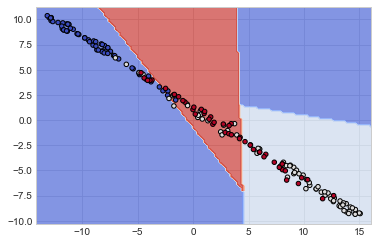

In [252]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [253]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099969, 0.00200272, 0.00100303, 0.00100303, 0.00100303]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [254]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [0.15,0.14,0.12 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


SyntaxError: invalid syntax (<ipython-input-254-69a0cf26540f>, line 5)

In [255]:
print('best',gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

best Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.15, kernel='linear'))])
최적 점수: 0.9800000000000001
최적 파라미터: {'model__C': 0.15, 'model__gamma': 'scale'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.001004,0.000015,0.000798,0.000399,0.12,scale,"{'model__C': 0.12, 'model__gamma': 'scale'}",0.972222,0.972222,0.972222,1.0,0.971429,0.977619,0.011195,1
5,0.000801,0.000401,0.000200,0.000401,0.12,auto,"{'model__C': 0.12, 'model__gamma': 'auto'}",0.972222,0.972222,0.972222,1.0,0.971429,0.977619,0.011195,1
0,0.001199,0.000400,0.000600,0.000490,0.15,scale,"{'model__C': 0.15, 'model__gamma': 'scale'}",0.944444,0.972222,0.972222,1.0,0.971429,0.972063,0.017571,3


## Kernel SVC

### 유방암

In [256]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [257]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [259]:
model.get_params() # default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [260]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.9868131868131869
표준화 평가 데이터 점수: 0.9824561403508771


시각화

In [261]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [262]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [263]:
X_comp = TSNE(n_components=2).fit_transform(X)

In [264]:
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

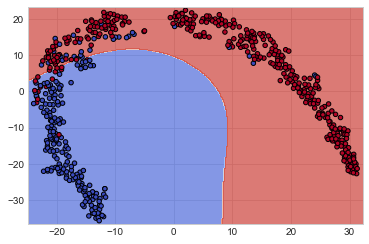

In [265]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [266]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00200105, 0.00300193, 0.00300193, 0.00199938, 0.0030005 ]),
 'score_time': array([0.00100088, 0.00100112, 0.00100112, 0.00100112, 0.00100088]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [267]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [0.15,0.14,0.12, 0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=12,
             param_grid=[{'model__C': [0.15, 0.14, 0.12, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [268]:
print('best',gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

best Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(C=0.15))])
최적 점수: 0.9525539512498058
최적 파라미터: {'model__C': 0.15, 'model__gamma': 'scale'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004203,4.001148e-04,0.001001,2.336015e-07,0.15,scale,"{'model__C': 0.15, 'model__gamma': 'scale'}",0.947368,0.938596,0.964912,0.95614,0.955752,0.952554,0.008916,1
1,0.004004,1.907349e-07,0.001001,4.672031e-07,0.15,auto,"{'model__C': 0.15, 'model__gamma': 'auto'}",0.947368,0.938596,0.964912,0.95614,0.955752,0.952554,0.008916,1
2,0.003803,3.999005e-04,0.001001,1.907349e-07,0.14,scale,"{'model__C': 0.14, 'model__gamma': 'scale'}",0.929825,0.929825,0.964912,0.95614,0.955752,0.947291,0.014633,3


### 붓꽃

In [269]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [270]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [272]:
model.get_params() # default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [273]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 0.9833333333333333
표준화 평가 데이터 점수: 0.9333333333333333


시각화

In [274]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [275]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [276]:
X_comp = TSNE(n_components=2).fit_transform(X)

In [277]:
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

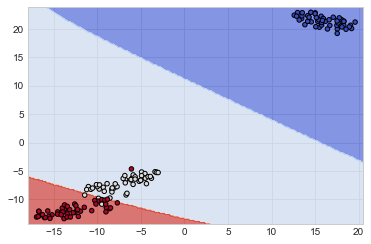

In [278]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [279]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00100064, 0.00100064, 0.00100064, 0.00100064, 0.00200105]),
 'score_time': array([0.       , 0.       , 0.0010004, 0.0010004, 0.       ]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [295]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [6.0,5.5,5.0,1.0,0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=12,
             param_grid=[{'model__C': [6.0, 5.5, 5.0, 1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [296]:
print('best',gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

best Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(C=6.0))])
최적 점수: 0.9733333333333334
최적 파라미터: {'model__C': 6.0, 'model__gamma': 'scale'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001405,0.000202,0.000000,0.000000,6,scale,"{'model__C': 6.0, 'model__gamma': 'scale'}",1.0,0.966667,0.966667,0.933333,1.0,0.973333,0.024944,1
1,0.001007,0.000449,0.000201,0.000402,6,auto,"{'model__C': 6.0, 'model__gamma': 'auto'}",1.0,0.966667,0.966667,0.933333,1.0,0.973333,0.024944,1
2,0.000402,0.000492,0.000600,0.000490,5.5,scale,"{'model__C': 5.5, 'model__gamma': 'scale'}",1.0,0.966667,0.966667,0.933333,1.0,0.973333,0.024944,1


### 와인

In [297]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state=123)

In [298]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [299]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [300]:
model.get_params() # default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [301]:
print("표준화 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("표준화 평가 데이터 점수: {}".format(model.score(X_test, y_test)))


표준화 학습 데이터 점수: 1.0
표준화 평가 데이터 점수: 0.9722222222222222


시각화

In [302]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [303]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [304]:
X_comp = TSNE(n_components=2).fit_transform(X)

In [305]:
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

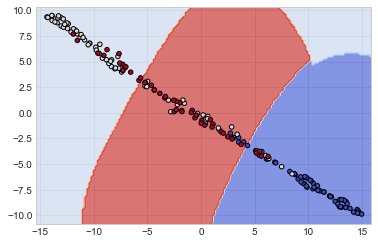

In [306]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');


In [307]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validator = cross_validate(
                    estimator=estimator,
                    X=X, y=y,
                    cv=5, 
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True)

cross_validator

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099182, 0.00099182, 0.00199032, 0.00199032, 0.0009985 ]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.00100303]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [308]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [6.0,5.5,5.0,1.0,0.1, 0.01]}]

gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            n_jobs=multiprocessing.cpu_count(),
            cv=5, 
            verbose=True)

gs.fit(X, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=12,
             param_grid=[{'model__C': [6.0, 5.5, 5.0, 1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [309]:
print('best',gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
result = gs.fit(X, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score').head(3)

best Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(C=6.0))])
최적 점수: 0.9888888888888889
최적 파라미터: {'model__C': 6.0, 'model__gamma': 'scale'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001400,0.000491,0.000000,0.000000,6,scale,"{'model__C': 6.0, 'model__gamma': 'scale'}",1.0,0.972222,0.972222,1.0,1.0,0.988889,0.013608,1
1,0.001202,0.000401,0.000402,0.000492,6,auto,"{'model__C': 6.0, 'model__gamma': 'auto'}",1.0,0.972222,0.972222,1.0,1.0,0.988889,0.013608,1
2,0.001202,0.000400,0.000401,0.000491,5.5,scale,"{'model__C': 5.5, 'model__gamma': 'scale'}",1.0,0.972222,0.972222,1.0,1.0,0.988889,0.013608,1
